In [37]:
#import necessary libraries
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

In [38]:
# Load the image (adjust the file path to your image)
image_path = '/content/fruits.jpg'
image = cv2.imread(image_path)

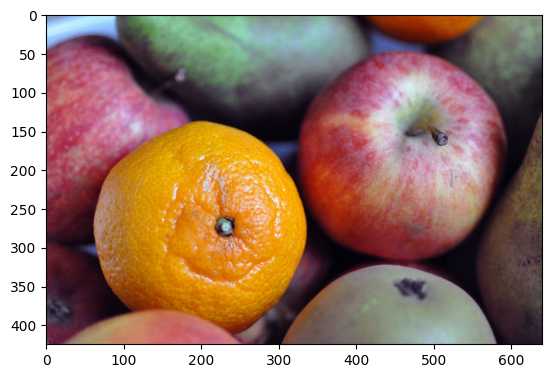

In [39]:
# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

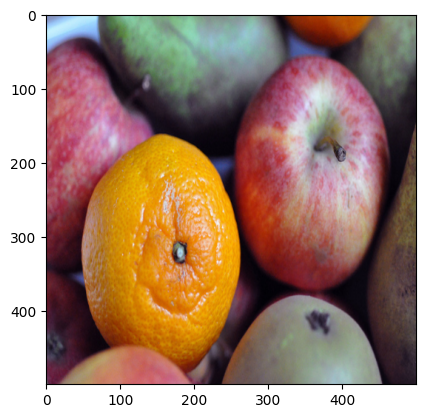

In [40]:
# Resize the image to 500x500 pixels
resized_image = cv2.resize(image_rgb, (500, 500))

# Save the preprocessed image
cv2.imwrite('resized_image.jpg', resized_image)

# Display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis()
plt.show()

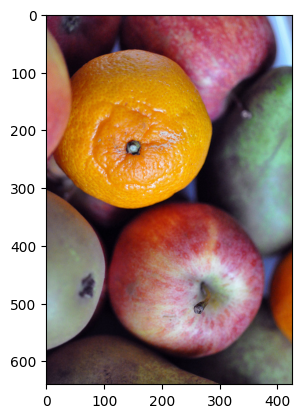

In [41]:
# Rotate the image (90 degrees clockwise)
rotated_image_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Save the rotated image
cv2.imwrite('rotated_image_90.jpg', rotated_image_90)

# Display the rotated image using matplotlib
plt.imshow(rotated_image_90)
plt.axis()
plt.show()

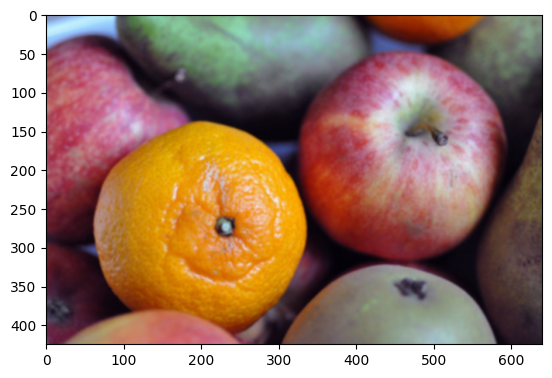

In [42]:
# Denoise the image using Gaussian blur
denoised_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the denoised image
cv2.imwrite('denoised_image.jpg', denoised_image)

# Display the denoised image using matplotlib
plt.imshow(denoised_image)
plt.axis()
plt.show()

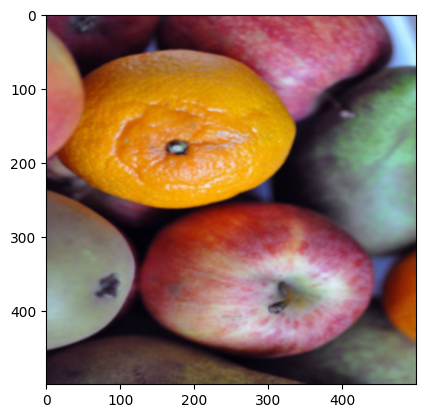

In [43]:
#apply resizing, rotation and denoising to the image and save it as processed image
image = cv2.imread('/content/fruits.jpg')

# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#resize thesame image to 500x500 pixel
image_rgb = cv2.resize(image_rgb, (500, 500))

# Rotate the image (90 degrees clockwise)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Denoise the image using Gaussian blur
image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the processed image
cv2.imwrite('processed_image.jpg', image_rgb)

# Display the denoised image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

# Image Annotation
- Manually add metadata such as keywords and a description.

In [44]:
# metadata for the processed fruit image
metadata = {
    "processed_image.jpg": {
        "keywords": ["Fruits", "Healthy food", "green"],
        "description": "A processed fruit image with resizing, rotation, and denoising applied."
    }
}

In [45]:
# Save metadata to a JSON file
with open('image_metadata.json', 'w') as json_file:
    json.dump(metadata, json_file, indent=4)

- Metadata Structure: A dictionary is created with the image name as the key, containing keywords and a description.
- Saving: The metadata is saved as a JSON file for later use.

# Image Feature Extraction
- Extract features such as mean and norm intensity

In [46]:
import cv2
from skimage import feature
import numpy as np

In [47]:
# Load the processed fruit image, earlier saved
processed_image = cv2.imread('/content/processed_image.jpg')

In [48]:
# Calculate mean and norm of pixel intensities
mean_intensity = np.mean(processed_image)
norm_intensity = np.linalg.norm(processed_image)

In [49]:
print(f'The mean intensity is {mean_intensity}, and the norm intensity is {norm_intensity}')

The mean intensity is 105.42592133333333, and the norm intensity is 107316.0217162377


Extract Shape features such as
- Area
- Perimeter
- Centroid
- Bounding box

In [51]:
# Convert to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Find contours from the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour to calculate the shape features
for contour in contours:
    # Area
    area = cv2.contourArea(contour)

    # Perimeter (arc length)
    perimeter = cv2.arcLength(contour, True)  # True means the contour is closed

    # Centroid (center of mass)
    moments = cv2.moments(contour)
    if moments["m00"] != 0:
        cX = int(moments["m10"] / moments["m00"])
        cY = int(moments["m01"] / moments["m00"])
    else:
        cX, cY = 0, 0

    # Bounding box (smallest rectangle that contains the object)
    x, y, w, h = cv2.boundingRect(contour)


    # Print the shape features
    print(f"Area: {area}, Perimeter: {perimeter}, Centroid: ({cX}, {cY}), Bounding Box: ({x}, {y}), Width: {w}, Height: {h}")


Area: 0.0, Perimeter: 18.485281229019165, Centroid: (0, 0), Bounding Box: (302, 396), Width: 9, Height: 3
Area: 11.0, Perimeter: 64.42640578746796, Centroid: (321, 395), Bounding Box: (310, 391), Width: 20, Height: 10
Area: 15.5, Perimeter: 115.982754945755, Centroid: (308, 398), Bounding Box: (300, 386), Width: 23, Height: 20
Area: 14.5, Perimeter: 105.154327750206, Centroid: (75, 375), Bounding Box: (66, 367), Width: 27, Height: 16
Area: 6.5, Perimeter: 67.69848418235779, Centroid: (322, 364), Bounding Box: (313, 361), Width: 18, Height: 16
Area: 5.5, Perimeter: 27.55634868144989, Centroid: (94, 357), Bounding Box: (92, 355), Width: 7, Height: 11
Area: 8.0, Perimeter: 64.42640578746796, Centroid: (82, 354), Bounding Box: (72, 350), Width: 21, Height: 17
Area: 104.0, Perimeter: 643.0092276334763, Centroid: (84, 343), Bounding Box: (0, 253), Width: 121, Height: 202
Area: 0.5, Perimeter: 11.41421353816986, Centroid: (231, 238), Bounding Box: (231, 238), Width: 6, Height: 2
Area: 18.0, P

In [52]:
#collect all the shape features as a dictionary
shape_feature = {
        "area": area,
        "perimeter": perimeter,
        "centroid": (cX, cY),
        "bounding_box": (x, y, w, h)
    }

In [53]:
# Collect all the features extracted from the processed_image and store as a meta data
features_extracted = {
    "mean_intensity": mean_intensity,  # Mean intensity calculated earlier
    "norm_intensity": norm_intensity,  # Norm intensity calculated earlier
    "shape_features": shape_feature  # List to hold shape features for each object
}

In [54]:
# Save the features to a JSON file
with open('image_features.json', 'w') as json_file:
    json.dump(features_extracted, json_file, indent=4)

# Text preprocessing

In [55]:
#import necessary library
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [68]:
# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [63]:
#Load the content of the specified file
with open('/content/101551') as file:
  document_101551 = file.read()

In [64]:
print(document_101551[621:-15])

:
|> : 	I have been active in defending Saturn lately on the net and would
|> : like to state my full opinion on the subject, rather than just reply to others'
|> : points.
|> : 	
|> : 	The biggest problem some people seem to be having is that Saturn
|> : Dealers make ~$2K on a car.  I think most will agree with me that the car is
|> : comparably priced with its competitors, that is, they aren't overpriced 
|> : compared to most cars in their class.  I don't understand the point of 
|> : arguing over whether the dealer makes the $2K or not?  
|> 
|> I have never understood what the big deal over dealer profits is either.
|> The only thing that I can figure out is that people believe that if
|> they minimize the dealer profit they will minimize their total out-of-pocket
|> expenses for the car. While this may be true in some cases, I do not
|> believe that it is generally true. I bought a Saturn SL in January of '92.
|> AT THAT TIME, based on studying car prices, I decided that there wa

Create a sample of document file from the ingested file. We are filtering out the first 621 characters from the begining and last 15 characters from the ending.

In [65]:
document_sample=document_101551[621:-15]

Preprocessing Techniques:

- Text Normalization (Lowercasing)
- Tokenization & Removal of Punctuation and Stop Words
- Stemming reduces a word to its root or base form by removing prefixes and suffixes.
- Lemmatization reduces word to their dictionary base form (lemma)

In [66]:
# Text Normalization: Convert document_101551 to lowercase and rename as document_101551_lower
document_sample_lower = document_sample.lower()

In [69]:
# Tokenization: Split document_101551_lower into words
tokens = word_tokenize(document_sample_lower)

In [70]:
#Removal of punctuation
tokens = [word for word in tokens if word not in string.punctuation]

In [71]:
#Removal of stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

In [72]:
# Print the preprocessed tokens
print("Preprocessed Tokens:", tokens)

Preprocessed Tokens: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'points', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealers', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitors', "n't", 'overpriced', 'compared', 'cars', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'makes', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profits', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expenses', 'car', 'may', 'true', 'cases', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'prices', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expenses', 'would', "n't", 'different', "'s", 'important', 'much

Stemming and lemmatization

In [73]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [74]:
# Apply stemming to the tokens
stemmed_words = [stemmer.stem(word) for word in tokens]

# Print the stems from the tokens
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['activ', 'defend', 'saturn', 'late', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'repli', 'other', 'point', 'biggest', 'problem', 'peopl', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agre', 'car', 'compar', 'price', 'competitor', "n't", 'overpr', 'compar', 'car', 'class', "n't", 'understand', 'point', 'argu', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figur', 'peopl', 'believ', 'minim', 'dealer', 'profit', 'minim', 'total', 'out-of-pocket', 'expens', 'car', 'may', 'true', 'case', 'believ', 'gener', 'true', 'bought', 'saturn', 'sl', 'januari', "'92", 'time', 'base', 'studi', 'car', 'price', 'decid', 'compar', 'car', 'price', 'cheapli', 'saturn', 'sure', 'mayb', 'could', 'talk', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expens', 'would', "n't", 'differ', "'s", 'import', 'much', 'money', 'left', 'buy', 'car', 'reduc', 'dealer', 'profit', 'thing', 'sa

In [75]:
# Apply lemmatization to the tokens
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

# Print the lemma from the tokens
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'point', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitor', "n't", 'overpriced', 'compared', 'car', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expense', 'car', 'may', 'true', 'case', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'price', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expense', 'would', "n't", 'different', "'s", 'important', 'much', 'money', '

Text Vectorization
We will convert the preprocessed text into two numerical representations:

- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [77]:
# Create a simple corpus with your document as the only entry
corpus = [document_sample]

In [78]:
#Bag of Words (BoW) for document file
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(corpus)

In [79]:
#Print the BoW representation
print("Bag of Words Representation:\n", bow_matrix.toarray())
print("Vocabulary:", vectorizer_bow.get_feature_names_out())

Bag of Words Representation:
 [[ 3  1  1  1  3  1  1  2  1  1  2  1  1  1  3  2  1  2  1  5  1  3  3  2
   1  1  1  1  2  1  2  1  1  1  8  4  1  1  2  1  1  1  2  1  1 11  1  1
   1  1  1  1  2  1  1  3  2  1  1  5  1  1  1  1  1  1  5  1  2  4  2  4
   9  2  5  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  5  2  7  1  1  2
   1  3  1  1  1  1  5  1  7  4  3  1  1  2  1  3  2  1  1  1  1  3  2  1
   1  3  2  2  1  9  1  1  1  2  3  1  2  9  1  2  1  3  2  1  1  1  1  3
   1  1  1  1  1  1  1 14 24  4  1  3  1  4  2  1  1  1  9  1  2  1  1  3
   2  1  1  6  3  4  1  2  1]]
Vocabulary: ['1000' '12k' '13k' '2000' '2k' '92' 'active' 'after' 'agree' 'already'
 'and' 'any' 'aren' 'arguing' 'as' 'at' 'attract' 'average' 'based' 'be'
 'because' 'been' 'believe' 'below' 'benefit' 'better' 'big' 'biggest'
 'bought' 'but' 'buy' 'buyers' 'by' 'can' 'car' 'cars' 'cases' 'cheaply'
 'class' 'comparable' 'comparably' 'compared' 'competitors' 'could' 'deal'
 'dealer' 'dealers' 'deals' 'decided' 'defend

In [80]:
#TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus)

In [81]:
#Print the TF-IDF representation
print("\nTF-IDF Representation:\n", tfidf_matrix.toarray())
print("Vocabulary:", vectorizer_tfidf.get_feature_names_out())


TF-IDF Representation:
 [[0.06611395 0.02203798 0.02203798 0.02203798 0.06611395 0.02203798
  0.02203798 0.04407596 0.02203798 0.02203798 0.04407596 0.02203798
  0.02203798 0.02203798 0.06611395 0.04407596 0.02203798 0.04407596
  0.02203798 0.11018991 0.02203798 0.06611395 0.06611395 0.04407596
  0.02203798 0.02203798 0.02203798 0.02203798 0.04407596 0.02203798
  0.04407596 0.02203798 0.02203798 0.02203798 0.17630386 0.08815193
  0.02203798 0.02203798 0.04407596 0.02203798 0.02203798 0.02203798
  0.04407596 0.02203798 0.02203798 0.2424178  0.02203798 0.02203798
  0.02203798 0.02203798 0.02203798 0.02203798 0.04407596 0.02203798
  0.02203798 0.06611395 0.04407596 0.02203798 0.02203798 0.11018991
  0.02203798 0.02203798 0.02203798 0.02203798 0.02203798 0.02203798
  0.11018991 0.02203798 0.04407596 0.08815193 0.04407596 0.08815193
  0.19834184 0.04407596 0.11018991 0.02203798 0.02203798 0.02203798
  0.02203798 0.02203798 0.02203798 0.02203798 0.02203798 0.04407596
  0.02203798 0.02203798

# Metadata and Labeling
We’ll create a metadata document explaining the vectorization process and label the text data.



In [82]:
# Metadata about the vectorization process
metadata = {
    "vectorization_methods": {
        "bag_of_words": "Each word in the corpus is treated as a feature, and the text is represented by a count of each word.",
        "tf_idf": "Each word in the corpus is weighted based on its frequency in the document and its inverse frequency across all documents."
    },
    "document_summary": "This is a summary of the text data preprocessing and vectorization for document 101551.",
    "sentiment_label": "neutral"  # You can update this label based on your analysis
}

In [83]:
# Save metadata to a JSON file
with open('text_metadata.json', 'w') as json_file:
    json.dump(metadata, json_file, indent=4)